# UAS Project Streamlit: 
- **Nama:** [Bahteramon Bintang Sanjaya Manurung]
- **Dataset:** [Dataset Gambar-Gambar Bunga Dalam 5 Jenis meliput Daisy,Dandelion,Roses,Sunflower,Tulip. ("https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz")]
- **URL Website:** [Di isi jika web streamlit di upload]



## Menentukan Pertanyaan Bisnis

- Apakah terdapat website yang dapat membantu pengguna mengenali bunga yang dia beli ?
- Berapa jenis bunga yang dapat dikenali website ? 
- Seberapa akurat website dalam mengenali bunga ? 

## Import Semua Packages/Library yang Digunakan

In [75]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import random as rn
from tqdm import tqdm
from sklearn.decomposition import PCA

## Data Wrangling

### Gathering Data

In [76]:
X = []
Z = []
IMG_SIZE = 150

# Define directory paths for each flower type
FLOWER_DAISY_DIR = r'C:\Users\monba\Desktop\Kuliah III RPLK\Pemrograman Pararel\flower_photos\daisy'
FLOWER_SUNFLOWER_DIR = r'C:\Users\monba\Desktop\Kuliah III RPLK\Pemrograman Pararel\flower_photos\sunflowers'
FLOWER_TULIP_DIR = r'C:\Users\monba\Desktop\Kuliah III RPLK\Pemrograman Pararel\flower_photos\tulips'
FLOWER_DANDI_DIR = r'C:\Users\monba\Desktop\Kuliah III RPLK\Pemrograman Pararel\flower_photos\dandelion'
FLOWER_ROSE_DIR = r'C:\Users\monba\Desktop\Kuliah III RPLK\Pemrograman Pararel\flower_photos\roses'

# List of flower directories
flower_dirs = [
    (FLOWER_DAISY_DIR, 'daisy'),
    (FLOWER_SUNFLOWER_DIR, 'sunflower'),
    (FLOWER_TULIP_DIR, 'tulip'),
    (FLOWER_DANDI_DIR, 'dandelion'),
    (FLOWER_ROSE_DIR, 'rose')
]

### Assessing Data

In [77]:
def assign_label(img,flower_type):
    return flower_type
    
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
        
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))


100%|██████████| 633/633 [00:01<00:00, 518.89it/s]


633


100%|██████████| 699/699 [00:01<00:00, 470.41it/s]


1332


100%|██████████| 799/799 [00:01<00:00, 490.45it/s]


2131


100%|██████████| 898/898 [00:01<00:00, 550.40it/s]


3029


100%|██████████| 641/641 [00:01<00:00, 511.52it/s]

3670


### Cleaning Data

In [72]:
#None

## Exploratory Data Analysis (EDA)

### Explore ...

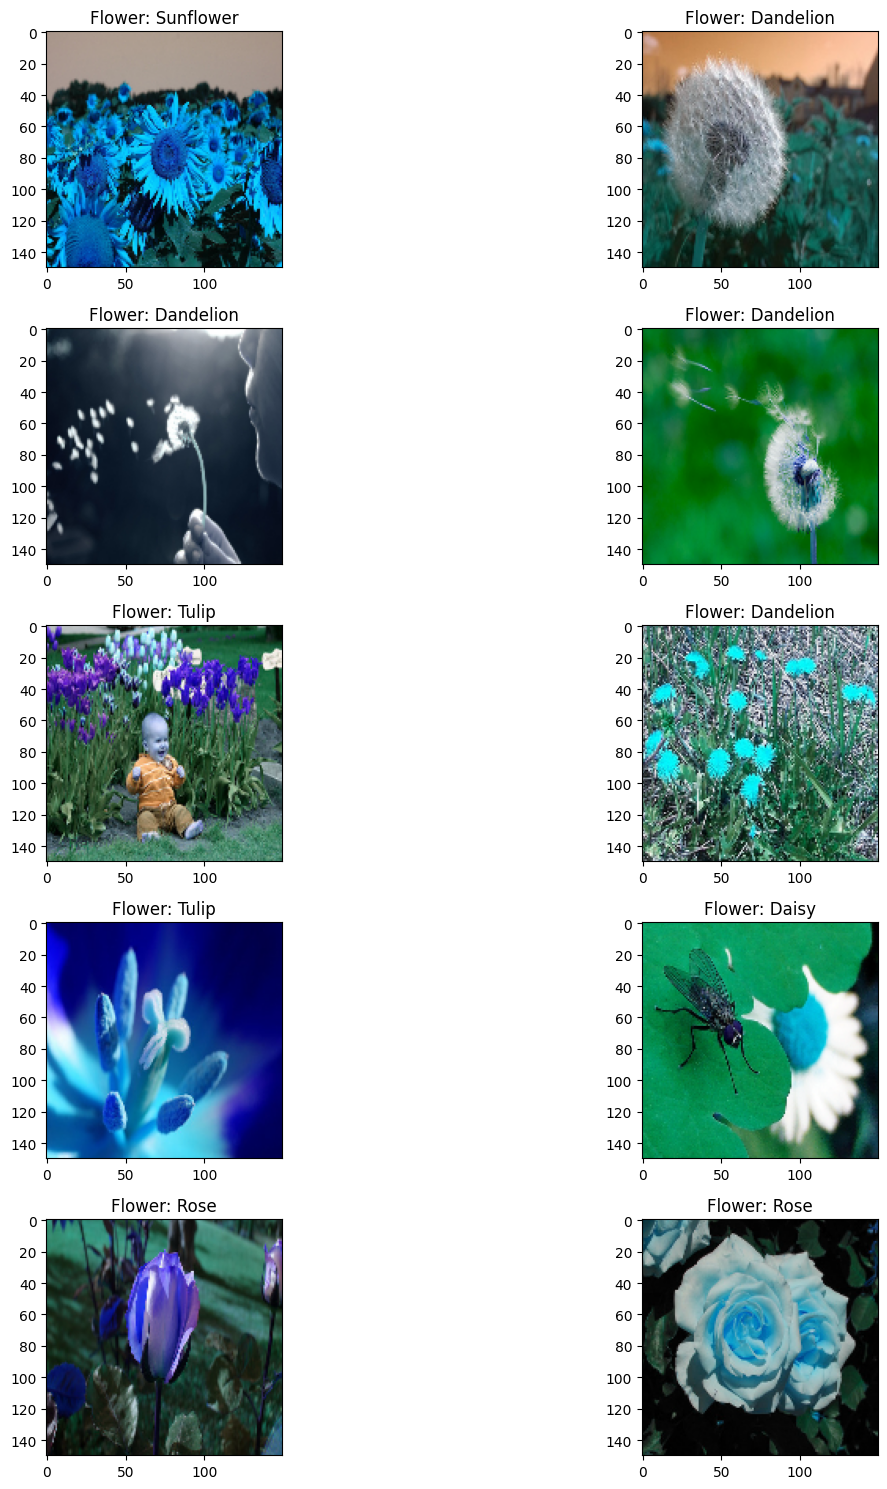

In [78]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

In [79]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [81]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

## Visualization & Explanatory Analysis

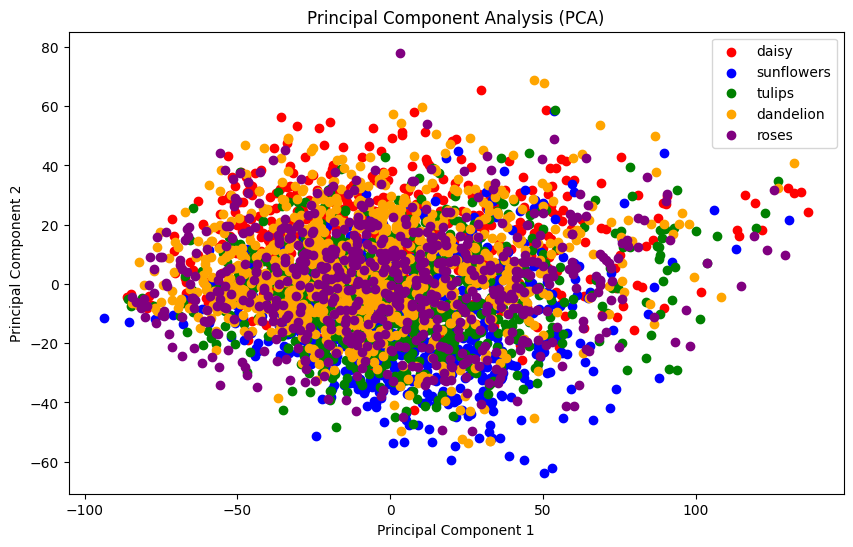

In [82]:
def visualize_principal_components(X):
    # Reshape images for PCA
    X_reshaped = X.reshape(X.shape[0], -1)
    
    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_reshaped)
    
    # Define colors for each flower type
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    # Plot PCA components
    plt.figure(figsize=(10, 6))
    for i, flower_type in enumerate(flower_types):
        mask = (y[:, i] == 1)
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=flower_type, color=colors[i])
    plt.title('Principal Component Analysis (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Visualize PCA components
visualize_principal_components(X)




## Membuat Model 

In [83]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [84]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [85]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [87]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 18, 18, 96)       

### Training Model

In [90]:
# Train the model using the fit method
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
21/21 [==============================] - 29s 1s/step - loss: 0.9686 - accuracy: 0.6056 - val_loss: 0.9772 - val_accuracy: 0.6275
Epoch 2/50
21/21 [==============================] - 28s 1s/step - loss: 0.8962 - accuracy: 0.6492 - val_loss: 1.0165 - val_accuracy: 0.6024
Epoch 3/50
21/21 [==============================] - 27s 1s/step - loss: 0.8550 - accuracy: 0.6585 - val_loss: 0.8369 - val_accuracy: 0.6678
Epoch 4/50
21/21 [==============================] - 29s 1s/step - loss: 0.8314 - accuracy: 0.6806 - val_loss: 0.8213 - val_accuracy: 0.6993
Epoch 5/50
21/21 [==============================] - 31s 1s/step - loss: 0.7811 - accuracy: 0.6921 - val_loss: 0.8290 - val_accuracy: 0.6993
Epoch 6/50
21/21 [==============================] - 28s 1s/step - loss: 0.7899 - accuracy: 0.6917 - val_loss: 0.8340 - val_accuracy: 0.6797
Epoch 7/50
21/21 [==============================] - 28s 1s/step - loss: 0.7684 - accuracy: 0.7012 - val_loss: 0.7743 - val_accuracy: 0.7102
Epoch 8/50
21/21 [==

### Evaluasi Model

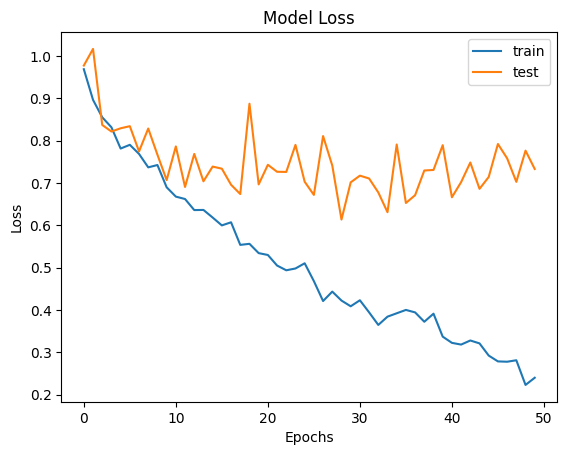

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

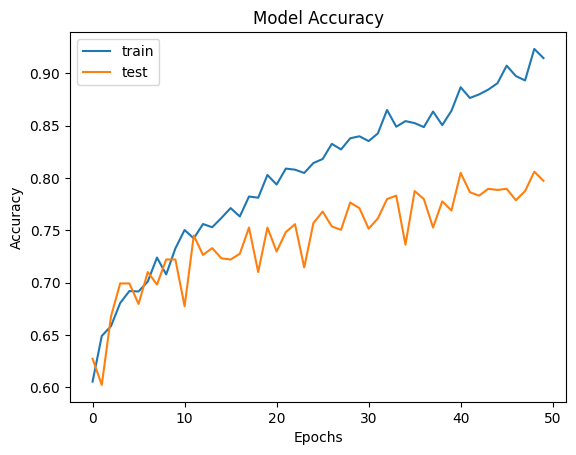

In [94]:
plt.plot(history.history['accuracy'])  # 'accuracy' instead of 'acc'
plt.plot(history.history['val_accuracy'])  # 'val_accuracy' instead of 'val_acc'
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Menyimpan Model

In [95]:
# Save the trained model
model.save("grand_final_recognition_model.h5")

c:\Program Files\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Conclusion

- Website dapat membantu pengguna mengenali bunga dengan memasukkan input file bunga, lalu website akan menampilkan identifikasi bunga kepada pengguna
- Terdapat Lima Jenis bunga yang dapat dikenali. Meliputi Daisy, Rose, Dandelion, Tulip, dan Sunflower 
- Akurasi website adalah : 
    a. accuracy: 0.9146
    b. val_accuracy: 0.7974